In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('train.csv')

In [73]:
df.head()

,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,5,7,2003,2003,12,13,196.0,706,150,...,False,False,False,False,True,False,False,False,True,False
1,9600,24,6,1976,1976,8,8,0.0,978,284,...,False,False,False,False,True,False,False,False,True,False
2,11250,5,7,2001,2002,12,13,162.0,486,434,...,False,False,False,False,True,False,False,False,True,False
3,9550,6,7,1915,1970,13,15,0.0,216,540,...,False,False,False,False,True,False,False,False,False,False
4,14260,15,8,2000,2000,12,13,350.0,655,490,...,False,False,False,False,True,False,False,False,True,False


In [41]:
df.shape

(1460, 81)

In [42]:
df.isnull().sum().sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [43]:
cols_to_drop = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence',
    'MasVnrType', 'FireplaceQu', 'LotFrontage'
]

In [44]:
df.drop(cols_to_drop, axis=1, inplace=True)

In [45]:
df.isnull().any().sort_values(ascending=False)[:15]

,0
GarageType,True
GarageCond,True
BsmtFinType2,True
BsmtFinType1,True
BsmtExposure,True
BsmtCond,True
BsmtQual,True
MasVnrArea,True
GarageYrBlt,True
GarageFinish,True


In [46]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]

In [47]:
df[null_columns.index].head()

,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA


In [48]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

In [49]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

In [52]:
df.isnull().sum().sort_values(ascending=False)

,0
Id,0
MSSubClass,0
MSZoning,0
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [54]:
len(categorical_cols)

37

In [69]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

In [60]:
from matplotlib import pyplot as plt
import seaborn as sns

In [57]:
# Get only numeric columns (before encoding)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation with target variable (assume 'SalePrice')
correlation = numeric_df.corr()['SalePrice'].sort_values(ascending=False)

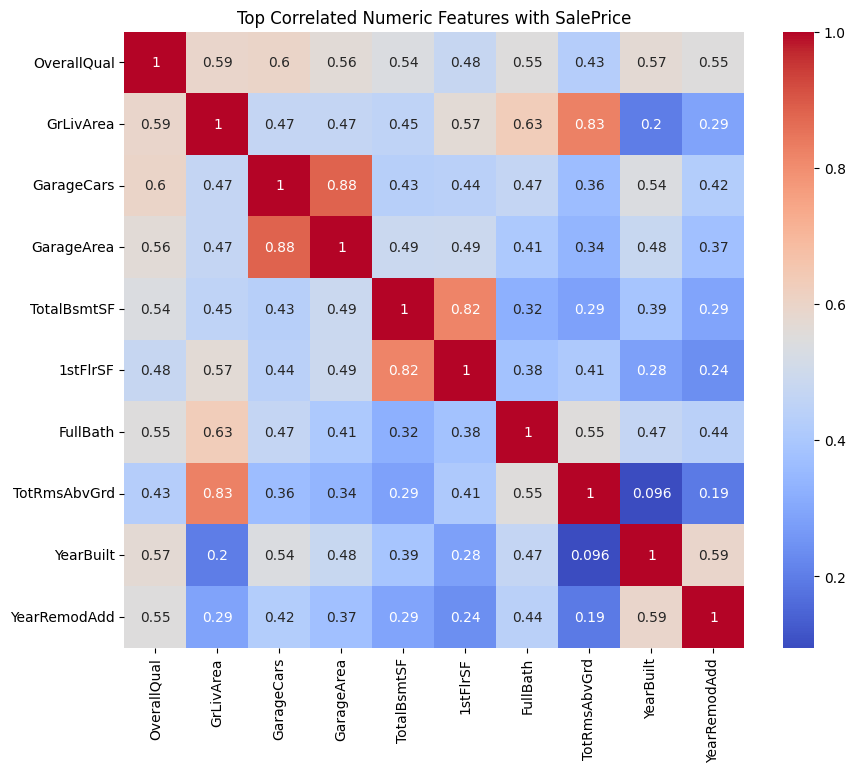

In [61]:
# Plot heatmap of top 10 correlated features
top_corr_features = correlation.index[1:11]  # skip 'SalePrice' itself

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Numeric Features with SalePrice')
plt.show()

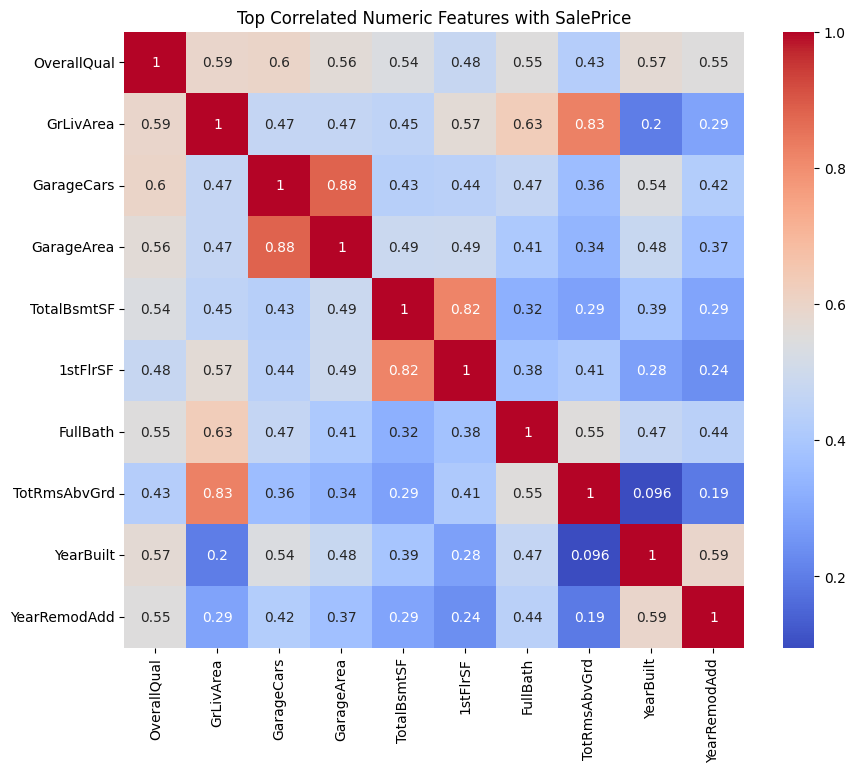

In [62]:
# Plot heatmap of top 10 correlated features
top_corr_features = correlation.index[1:11]  # skip 'SalePrice' itself

plt.figure(figsize=(10, 8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Numeric Features with SalePrice')
plt.show()

In [63]:
low_corr_features = correlation[correlation.abs() < 0.1].index.tolist()

# Optional: drop them
df.drop(columns=low_corr_features, inplace=True)

In [64]:
df.shape

(1460, 63)

In [65]:
onehot_cols = [
    col for col in df.select_dtypes(include='object').columns
    if df[col].nunique() <= 10
]

df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

In [66]:
df.head()

,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,CollgCr,7,2003,2003,VinylSd,VinylSd,196.0,706,150,...,False,False,False,False,True,False,False,False,True,False
1,9600,Veenker,6,1976,1976,MetalSd,MetalSd,0.0,978,284,...,False,False,False,False,True,False,False,False,True,False
2,11250,CollgCr,7,2001,2002,VinylSd,VinylSd,162.0,486,434,...,False,False,False,False,True,False,False,False,True,False
3,9550,Crawfor,7,1915,1970,Wd Sdng,Wd Shng,0.0,216,540,...,False,False,False,False,True,False,False,False,False,False
4,14260,NoRidge,8,2000,2000,VinylSd,VinylSd,350.0,655,490,...,False,False,False,False,True,False,False,False,True,False


In [67]:
from sklearn.preprocessing import LabelEncoder

high_card_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in high_card_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [68]:
df.head()

,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,5,7,2003,2003,12,13,196.0,706,150,...,False,False,False,False,True,False,False,False,True,False
1,9600,24,6,1976,1976,8,8,0.0,978,284,...,False,False,False,False,True,False,False,False,True,False
2,11250,5,7,2001,2002,12,13,162.0,486,434,...,False,False,False,False,True,False,False,False,True,False
3,9550,6,7,1915,1970,13,15,0.0,216,540,...,False,False,False,False,True,False,False,False,False,False
4,14260,15,8,2000,2000,12,13,350.0,655,490,...,False,False,False,False,True,False,False,False,True,False


In [74]:
df['SalePrice'].head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [75]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [78]:
num_cols

Index(['LotArea', 'Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice'],
      dtype='object')

In [79]:
# Copy dataframe to avoid modifying original
df_clean = df.copy()

# Loop through numeric columns
for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within bounds
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]


In [80]:
df_clean.head()

,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,5,7,2003,2003,12,13,196.0,706,150,...,False,False,False,False,True,False,False,False,True,False
1,9600,24,6,1976,1976,8,8,0.0,978,284,...,False,False,False,False,True,False,False,False,True,False
2,11250,5,7,2001,2002,12,13,162.0,486,434,...,False,False,False,False,True,False,False,False,True,False
4,14260,15,8,2000,2000,12,13,350.0,655,490,...,False,False,False,False,True,False,False,False,True,False
5,14115,11,5,1993,1995,12,13,0.0,732,64,...,False,False,False,False,True,False,False,False,True,False


In [82]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# for col in num_cols:
#     sns.boxplot(x=df_clean[col])
#     plt.title(col)
#     plt.show()

In [85]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_clean.drop('SalePrice', axis=1)
y = df_clean['SalePrice']

# Select only numerical features
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [86]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [99]:
X.head(1)

,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.126948,-1.072465,0.896557,0.99879,0.829408,0.757567,0.75632,1.261123,0.794827,-0.962866,...,False,False,False,False,True,False,False,False,True,False


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [92]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [93]:
lr.score(X_test, y_test)

0.823820791684251

In [94]:
svr.score(X_test, y_test)

0.0012489869738604442

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr = SVR()
param_grid = {
    'C': [1, 10, 100, 250, 500],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf', 'linear', 'poly']
}

grid_search = GridSearchCV(svr, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X, y)

print("Best R² score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)


Best R² score: 0.872837164763603
Best parameters: {'C': 500, 'epsilon': 0.5, 'kernel': 'linear'}


In [103]:
from sklearn.ensemble import RandomForestRegressor

In [104]:
rfr = RandomForestRegressor()

In [106]:
import numpy as np

In [107]:
y = np.log1p(y)

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider when looking for the best split
}

In [111]:
grid_search = GridSearchCV(rfr, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [112]:
print("Best R² score:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)

Best R² score: 0.833805148626497
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [120]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.823820791684251

In [113]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}


In [115]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=50)  # Try top 50
X_new = selector.fit_transform(X_train, y_train)

model = LinearRegression()
model.fit(X_new, y_train)
print("Train R²:", model.score(X_new, y_train))
print("Test R²:", model.score(selector.transform(X_test), y_test))

Train R²: 0.8996874665380089
Test R²: 0.8443223326426667


In [116]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=50)  # Try top 50
X_new = selector.fit_transform(X_train, y_train)

model = LinearRegression()
model.fit(X_new, y_train)
print("Train R²:", model.score(X_new, y_train))
print("Test R²:", model.score(selector.transform(X_test), y_test))

Train R²: 0.8996874665380089
Test R²: 0.8443223326426667


In [117]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid = GridSearchCV(ridge, params, cv=5, scoring='r2')
grid.fit(X, y)

print("Best R² (Ridge):", grid.best_score_)
print("Best alpha:", grid.best_params_)

Best R² (Ridge): 0.8659132766495462
Best alpha: {'alpha': 10}


In [119]:
from sklearn.linear_model import Lasso

params = {'alpha': [0.01, 0.1, 1, 10]}
lasso = Lasso(max_iter=10000)
grid = GridSearchCV(lasso, params, cv=5, scoring='r2')
grid.fit(X, y)

print("Best R² (Lasso):", grid.best_score_)
print("Best alpha:", grid.best_params_)

Best R² (Lasso): 0.8359916407718455
Best alpha: {'alpha': 0.01}


In [121]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(ridge, params, cv=5, scoring='r2')
grid.fit(X, y)

print("Best Ridge R²:", grid.best_score_)
print("Best alpha:", grid.best_params_)

Best Ridge R²: 0.8659132766495462
Best alpha: {'alpha': 10}


In [122]:
selected_features = X_train.columns[selector.get_support()]
print(selected_features)

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'Exterior2nd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MSZoning_FV', 'MSZoning_RL',
       'MSZoning_RM', 'LotShape_Reg', 'HouseStyle_2Story', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Gd',
       'BsmtQual_TA', 'BsmtExposure_No', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'HeatingQC_TA', 'CentralAir_Y', 'Electrical_SBrkr',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'PavedDrive_Y', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')


In [123]:
import joblib

joblib.dump(model, 'linear_reg_best.pkl')
joblib.dump(selector, 'feature_selector.pkl')

['feature_selector.pkl']

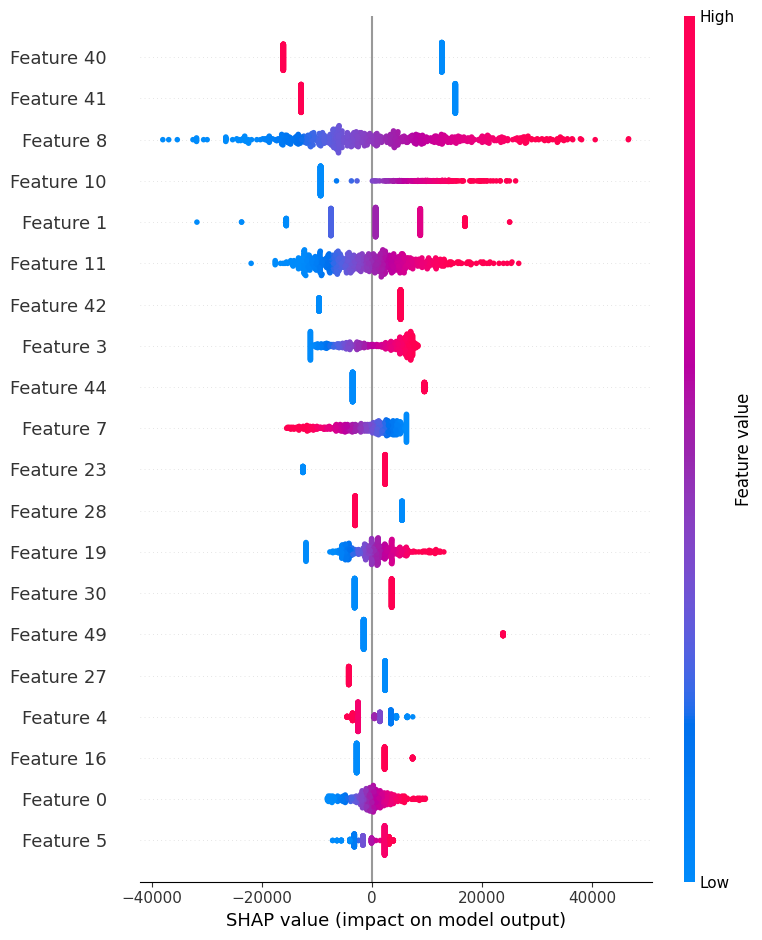

In [124]:
import shap

# Use model and X_new
explainer = shap.Explainer(model, X_new)
shap_values = explainer(X_new)

shap.summary_plot(shap_values, X_new)